<a href="https://colab.research.google.com/github/FernandoGuirraS/sigmoidal_data_science/blob/main/Analisando_dados_do_airbnb_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/94764799/142976748-5a82e169-06d9-492e-81f6-ba28dd06c394.png" height=60px> 

#### **Fernando Guirra**

*by [Guirra Datatec](https://medium.com/@guirradatatec)*

---

# Analisando Dados do Airbnb - Cidade do México

O [Airbnb](https://www.airbnb.com.br/) surgiu em 2008, por dois fundadores, que alugavam colchões infláveis para visitantes de uma feira de design depois que os hotéis lotavam. Inicialmente eram alugados apenas quartos de casas. Posteriormente, a idéia deu tão certo que começou a ser usado para aluguel de apartamentos e casas completas. A sigla Airbnb é separada em duas partes. O "Air" vem do fato de ter [iniciado por dois fundadores](https://www.viajenaviagem.com/dicas-airbnb-aluguel-apartamento/#:~:text=O%20que%20%C3%A9%20o%20AirBnB,que%20todos%20os%20hot%C3%A9is%20lotaram.). O "BnB" é uma abreviatura consagrada de "bed and breakfast". 

O Airbnb já é considerado a **maior empresa de hotelaria** sem possuir um único imóvel. Sua idéia é conectar pessoas a acomodações ao redor do mundo. Os anfitriões são responsável por disponibilizar o imóvel as pessoas que querem se hospedar. 

Segundos dados da [CanalTech](https://canaltech.com.br/mercado/numero-de-imoveis-ativos-do-airbnb-supera-as-maiores-redes-de-hoteis-combinadas-181472/), a Startup possui mais de $5,4$ milhões de anúncios ativos na plataforma, resultado que diferencia as redes de hotelaria tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science.*

<center><img alt="Analisando Airbnb" width="20%" src="https://user-images.githubusercontent.com/94764799/143017672-3c1d526f-0e9e-41fe-b672-b2a7854daebe.png"></center>

**Neste notebook, iremos analisar dados referentes a Cidade do México e descobrir as informações relevantes a partir dos dados.**

Esse notebook está dividido em *dois momentos*:
 > * **Dados:** onde serão aplicados as principais métricas para verificação no estado dos dados.
 > * **Visualização:** parte onde será visualizado o comportamento dos dados de maneira visual.
 > * **Conclusão:** fechamento das discusões do dataset.

O México é um país muito procurado entre os turistas, e eu tenho muita vontade de conhecer. O país está localizado na América do Norte e faz divisa com Estados Unidos da América, ao norte, e Guatemala e Belize ao sul. 

O clima predominante no país é tropical. São encontrados destinos litorâneos, como Cancun e Tulum, e históricos, como Puebla e Yucatán. 

Sua capital é a Cidade do México, uma das maiores metrópoles do mundo, onde apresenta roteiros cheios de atividades. As atrações são diversas como museus, centro histórico, praças e outras diversas.

Por essas e outras razões, essa foi a cidade escolhida para análise dos dados do Airbnb.

Vamos embarcar nessa aventura juntos? Bora comigo!

## Dados

### Obtenção dos dados

Os dados foram extraídos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Para essa análise, será utilizado apenas o seguinte arquivo:

* `listings.csv` - Summary information and metrics for listings in Mexico City.

In [35]:
# importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
# importando arquivo listings.csv para um dataframe
df = pd.read_csv("http://data.insideairbnb.com/mexico/df/mexico-city/2021-10-26/visualisations/listings.csv")

### Análise dos Dados

Essa etapa tem como objetivo verificar a situação inicial dos dados e seus comportamentos

**Dicionário das variáveis:**

* `id` - número para identificação do imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses
* `license` - essa variável não apresenta nenhum valor válido

Antes de iniciar as análise, vamos verificar as linhas iniciais do dataset.

In [37]:
# exibindo as 5 primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4037,1,0,NaN,NaN,1,363,0,NaN
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,3.95,10,350,1,NaN
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,64,2021-09-20,0.54,2,330,8,NaN
3,58955,Entire beautiful duplex in la Roma,282620,Laura,NaN,Cuauhtémoc,19.42113,-99.15955,Entire home/apt,1554,7,42,2020-01-31,0.80,1,54,0,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1917,4,39,2019-02-24,0.32,2,307,0,NaN


#### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa (`listings.csv.gz`).

In [38]:
# quantidade de entradas e variáveis
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# exibindos os tipos das variáveis
display(df.dtypes)

Entradas:	 19311
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

O dataset, por ser um arquivo resumido, possui $19311$ entradas e $18$ variáveis. As variáveis se dividem em int, float e object.  

#### **Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset se dá pela quantidade de valores ausentes que o mesmo apresenta. Para isso, é necessários verificar, inicialmente, os valores ausentes comparados com o total de entradas do dataset.

* É possível verificar que a variável `neighbourhood_group` e `licence` apresenta $100\%$ dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` apresenta quase $\displaystyle\frac{1}{4}$ de dados faltantes, totalizando pouco mais de $23\%$ dos valores ausentes. \\
* As variáveis `name` e `host_name` apresentam, aproximadamente, $0.1\%$ dos valores ausentes.

In [39]:
# Porcentagem de variaveis com valores ausentes de forma ordenada
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.231164
last_review                       0.231164
name                              0.000155
host_name                         0.000155
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

#### **Qual a média e variação dos preços na região?**

Uma maneira de verificar o preço das locação é verificar a média. O preço médio de cada locação custa aproximadamente $1300$ (valores da moeda local), o que é bastante elevado, e equivalente a quase $\displaystyle\frac{1}{3}$ quando comparado ao sálario mínimo do país que é de $3.747,9$ pesos mexicanos. Quando analisamos a variação dos preços em torno da média, dada pelo desvio padrão, podemos observar a alta variação dos preços na região, onde os valores variam em torno de $3832$ para mais e para menos que a média. 

Estatísticamente, a média não é uma métrica muito boa para comparação dos resultados, sendo muito sensível no resultado, podendo ser muito influenciado por valores já que leva em conta cada uma das observações. Neste caso, o melhor a se observar a mediana, que divide os dados ao meio, sendo uma boa representação da tendência central dos dados.

In [40]:
print("Preço médio dos valores de aluguel: {} \n".format(df['price'].mean()))

print("Variação do preço dos valores de aluguel: {}".format(df['price'].std()))

Preço médio dos valores de aluguel: 1298.7007405105899 

Variação do preço dos valores de aluguel: 3832.5230767330404


#### **Qual a mediana dos preços?**

A mediana é uma medida estatística que divide os dados em duas partes iguais de $50\%$ cada. A mediana não é sensível a valores extremos, o que pode envidenciar um melhor comportamento dos valores de uma variável quando comparado a média.

Podemos observar que há uma grande diferença entre o resultado da média e mediana. O resultado mostra que $50\%$ dos resultados estão abaixo de $793$ pesos mexicanos, o que envidencia os valores predominante na região. Isso pode sugerir que a variável possui valores extremos que estão mexendo com o comportamento da média em relação a mediana.

In [41]:
df['price'].median()

793.0

#### **Qual as métricas estatísticas das variáveis?**

As distribuições estatísticas das principais variáveis do dataset são apresentadas abaixo e traz informações importates. Vamos destacar as variáveis `price` e `minimum_nights`. 

* `price`: Primeiro, vamos olhar para o mínimo, onde podemos observar e imaginar que uma casa não é alugada de graça, onde o valor mínimo é $R\$ \;0.00$. Observamos que $50\%$ dos valores estão abaixo de $R\$ \;793.$ A variável apresenta um desvio padrão e média muito alto e esse valor é influenciado por valores que são inseridos, talvez, de maneira errônea no dataframe. Podemos observar o valor máximo em $R\$ \;350000.00,$ o que foge da realidade dos imóveis para locação da região.

* `minimum_nights`: Podemos observar que os valores se concentram entre $1$ e $3$ noites mínimas para alugar. São valores próximos a realidade pois geralmente são pensando em final de semana para compensar mais. Podemos observar que o valor máximo, e os próximos dele, influenciam na disposição da média e desvio padrão, pois alugar um imóvel de maneira anual (365 dias) não é a idéia da maioria das pessoas. 

In [42]:
# descrição das principais variáveis 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,19311.000000,19311.000000,19311.000000,14847.000000,19311.000000,19311.000000,19311.000000
mean,1298.700741,4.629020,27.532287,1.432074,7.657967,240.820361,7.591166
std,3832.523077,21.173971,50.266023,2.044616,16.634941,122.297563,16.856640
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,447.000000,1.000000,1.000000,0.300000,1.000000,141.000000,0.000000
50%,793.000000,2.000000,7.000000,0.880000,2.000000,299.000000,1.000000
75%,1366.000000,3.000000,30.000000,1.960000,6.000000,353.000000,8.000000
max,350000.000000,365.000000,560.000000,67.850000,126.000000,365.000000,484.000000


___

## Visualização

Nesse tópico serão apresentadas a forma como os dados estão dispostos de maneira visual.

### **Qual o tipo de distribuição das variáveis?**

Para isso, vamos plotar o histograma de todas as variáveis do dataset e verificar o comportamento visual individualmente. Podemos analisar comportamentos importantes na variável `price`, onde o gráfico vai até o valor de $30000,$ evidenciando valores extremos na variável. A variável `minimum_nights` mostra a predominância de acomodações com um número mínimo de noites entre $1$ e $10$ dias. O número de visualizaçãoes nas propriedades são bem próximas uma das outras, como é observado na variável `number_of_reviews`. O número de propriedades de cada anfitrião é dada pela variável `calculated_host_listings_count`, onde mostra que esse número pode chegar a $125$ acomodações. A disponibilidade das casas durante o ano é dada pela variável `availability_365` e por ser uma cidade turística, sempre apresenta espaços para locação disponível no decorrer de 365 dias.

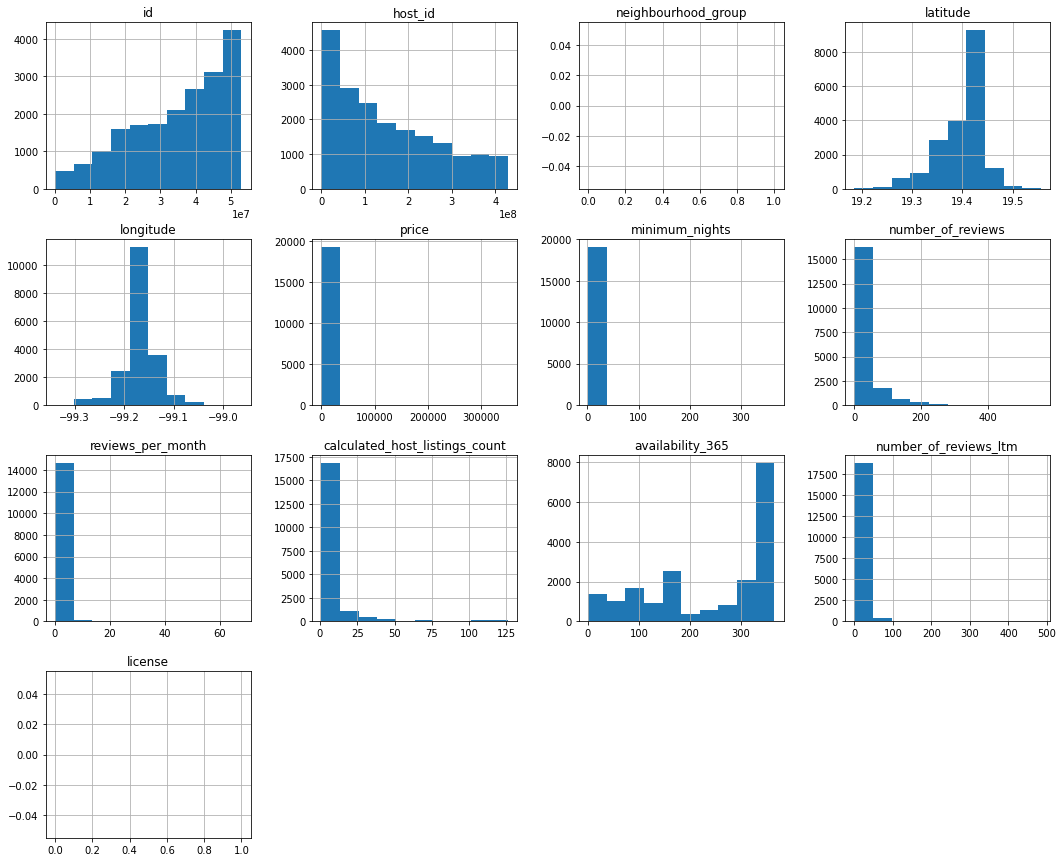

In [43]:
# histograma das variaveis do dataframe
df.hist(bins=10, figsize=(18,15));

### Qual a distribuição dos preços visualmente?

Quando detalhamos a variável preço, podemos observar que a predominância dos valores está abaixo de $1000$ mas existem propriedades com valores acima, um número baixo, que influenciam nos valores estatísticos da variável. 

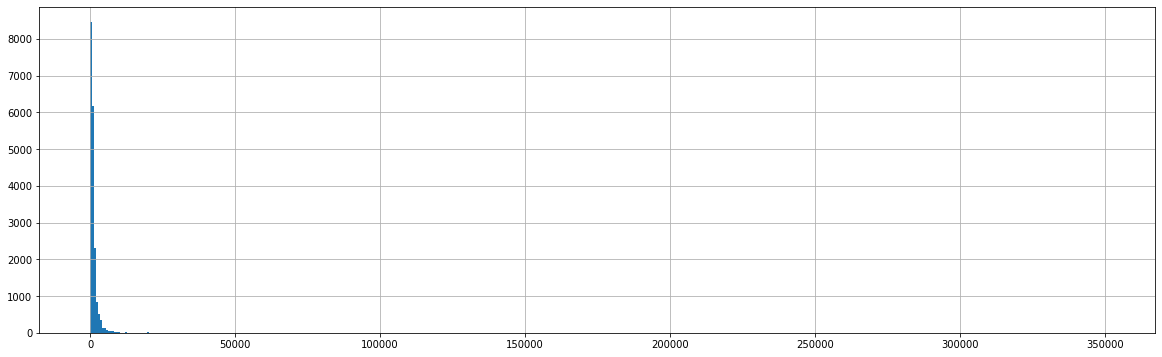

In [44]:
# histograma da variavel price
df['price'].hist(bins=500, figsize=(20, 6));

#### **Boxplot para `price`**

O boxplot é um diagrama em caixa que é construido utilizando o mínimo, máximo e os quartis que representam as porcentagens de $25\%, 50\% \;\mathrm{e}\; 75\%$ dos valores. Os valores que ultrapassam a linha máxima do boxplot pode ser representada por um possível outliers. Podemos observar que existem valores extremos que mudam muito o comportamento da variável. Pelo resultado apresentado, observamos $4$ observações acima de $10000$ que estão muito distante da representação dos dados.

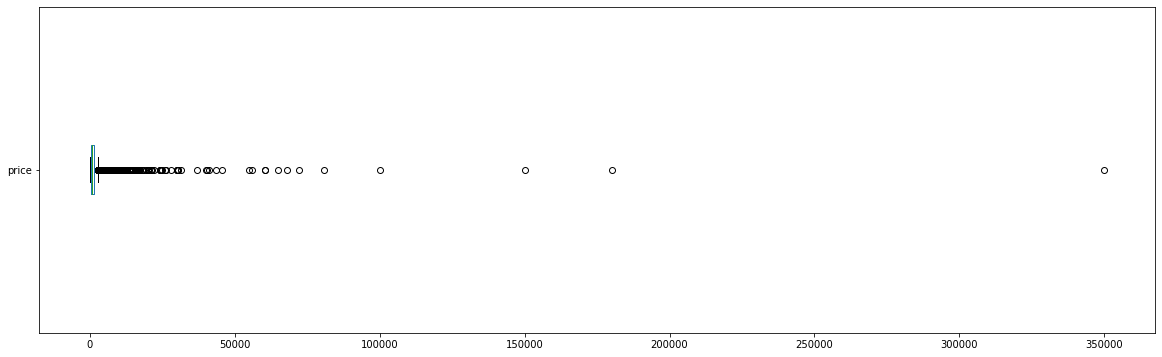

In [45]:
# boxplot variavel price
df['price'].plot(kind='box', figsize=(20,6), vert=False);

##### **Extraindo mais informações do boxplot na variável `price`**

Quando limitamos o eixo **x** no gráfico para visualizar os dados de maneira mais precisa, podemos observar os valores da mediana e máximo, evidenciando a grande quantidade de propriedades que apresentam preços fora dessa distribuição. A quantidade de propriedades com valores acima que a média, de $1298.77$, é de $5220$ o que mostra uma desigualdade nos valores médios das propriedades. Isso pode se da pela qualidade da casa, quantidade de comôdos e quartos e também sua localização, como bairros mais conhecidos e bem localizados.

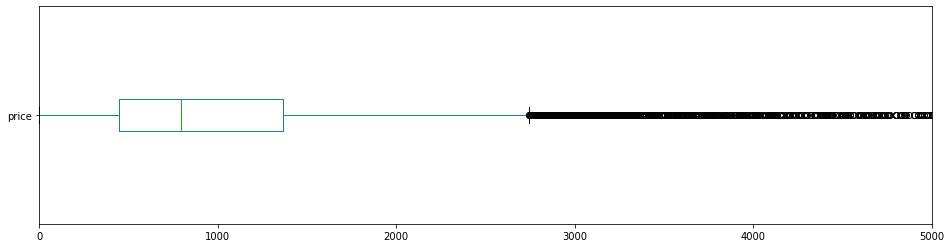

In [46]:
# boxplot variavel price
df['price'].plot(kind='box', figsize=(16,4), vert=False, xlim=(0,5000));

In [47]:
# Printando media dos preços, quantidade de valores acima da media e porcentagem de dados ausentes
print("Média dos preços: {}\n".format(df.price.mean()))

print("Quantidade de propriedades com preços acima da média: {}\n".format(df[df.price > df.price.mean()]['price'].count()))

print("Porcentagem de valores ausentes: {}\n". format(((len(df[df.price > df.price.mean()])) / df.shape[0]) * 100)  )

Média dos preços: 1298.7007405105899

Quantidade de propriedades com preços acima da média: 5220

Porcentagem de valores ausentes: 27.03122572627



In [48]:
# quantidade de valores da variável price acima da media
len(df[df.price > df.price.mean()])

5220

#### **Boxplot da variável `minimum_nights`**

O número de noites representa os valores próximos a 5 dias em média, mas a visualização mostra que existem diversas residências com o mínimo de noites para locação acima de $10$ e, ainda, residência acima de $300$ noites mínima para locação. Esses valores diferencem pelo fato de anfitriões que gostam de alugar aos finais de semana, em temporada, mensal e até mesmo anual.

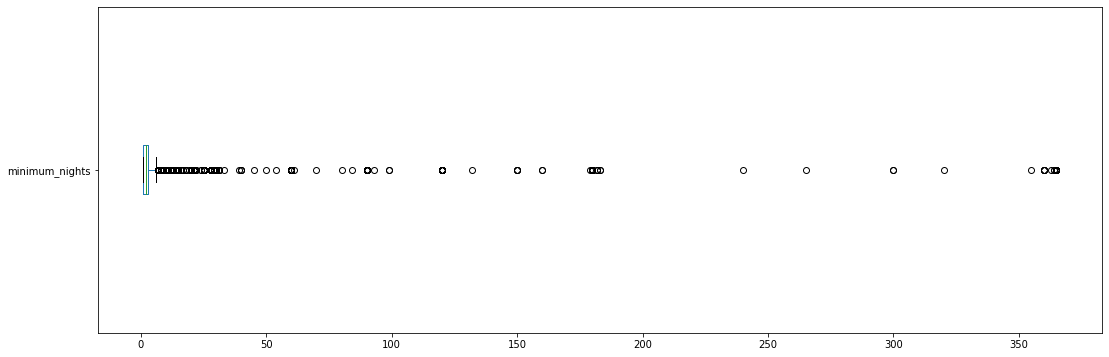

In [49]:
# boxplot variavel minimum_nights
df['minimum_nights'].plot(kind='box', figsize=(18, 6), vert=False)

### Limpeza dos dados

A qualidade de um *dataset* está diretamente ligada a qualidade dos dados. Com isso, é preciso identificar a existência de outliers, os valores que fogem da normalidade, para não apresentar anomalias nos resultados dos testes. 

Para isso, vamos realizar uma limpeza de maneira simples, apenas excluindo alguns dos dados, para melhor representação dos dados.

Aqui, vamos eliminar as colunas `neighbourhood_group` e `license` e as linhas das colunas `price` e `minimum_nights` onde os dados fogem da normalidade da maioria dos dados.

In [50]:
# copiando dataframe para variavel df_limpo
df_limpo = df.copy()

# eliminando anomalias das variaveis price e minimum_nights
df_limpo.drop(df_limpo[df_limpo.price > 1500].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 15].index, axis=0, inplace=True)

# eliminando as colunas neighbourhood_group e license
df_limpo.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

#verificando a quantidade de valores ausentes
df_limpo.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3064
reviews_per_month                 3064
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

As colunas `last_review` e `reviews_per_month` nos vamos tratá - las de maneira diferente. Para não perder as informações das demais variáveis nas linhas ausentes dessas variáveis, vamos preencher com o valor 
mediano que representa o melhor comportamento dos dados das mesmas. A variável `last_review` é do tipo *string* e para isso vamos preencher pelo índice que se encontra na metade do tamanho dos dados. 

In [51]:
# capturando todos os valores da variável e verificando o index que é o valor da metade do tamanho dos dados
lr = df.last_review.dropna().sort_values()

# salvando mediana das variaveis
mediana_ls = len(lr) / 2
mediana_rpm = df_limpo.reviews_per_month.median()

# preenchendo as colunas com a mediana
df_limpo['last_review'].fillna(mediana_ls, inplace=True)
df_limpo['reviews_per_month'].fillna(mediana_rpm, inplace=True)

#verificando a quantidade dos valores ausentes
df_limpo.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [52]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4037,1,0,NaN,NaN,1,363,0,NaN
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,15000,1,50,2021-08-23,3.95,10,350,1,NaN
2,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,600,2,64,2021-09-20,0.54,2,330,8,NaN
3,58955,Entire beautiful duplex in la Roma,282620,Laura,NaN,Cuauhtémoc,19.42113,-99.15955,Entire home/apt,1554,7,42,2020-01-31,0.80,1,54,0,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1917,4,39,2019-02-24,0.32,2,307,0,NaN


#### Verificação das variáveis após o tratamento dos dados

Após a limpeza dos dados podemos notar um comportamento mais adequado da variável `price` e `minimum_nights` apresentam comportamentos mais adequados mediante a maioria dos dados. O preço apresentar valores mais concentrados nos que vistos nos gráficos anteriormente.

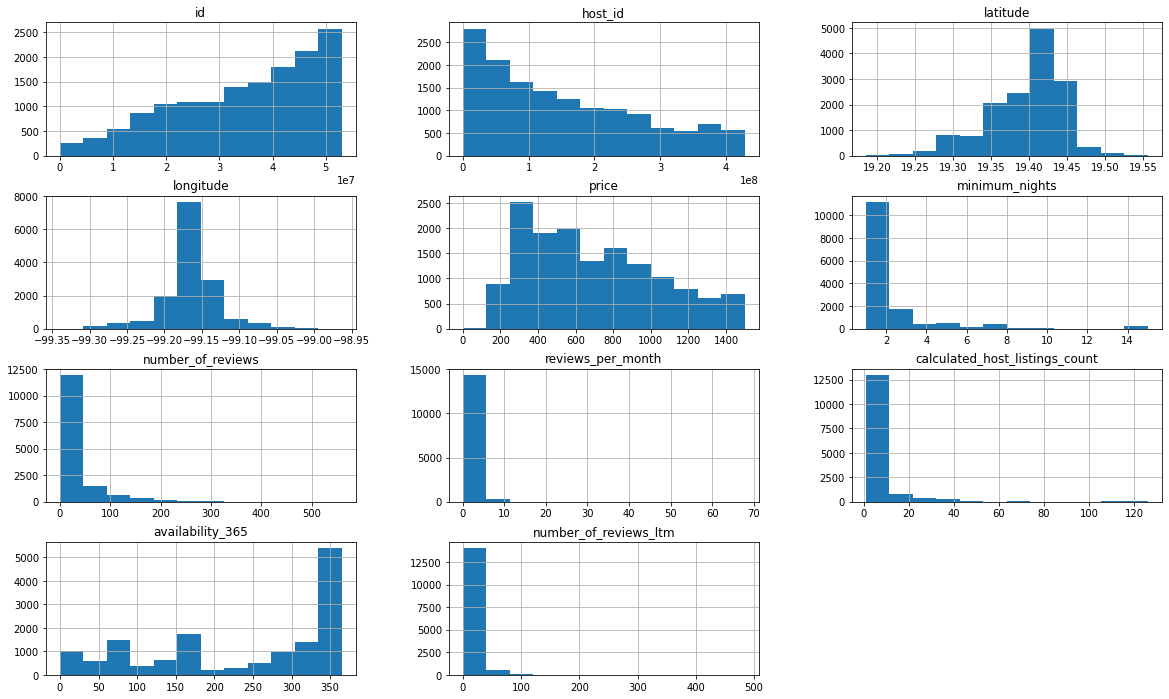

In [53]:
df_limpo.hist(bins=12, figsize=(20, 12));

#### Qual a correlação entre as variáveis?

In [54]:
# correlação das variáveis
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews',
                'calculated_host_listings_count', 'reviews_per_month', 'availability_365']].corr()

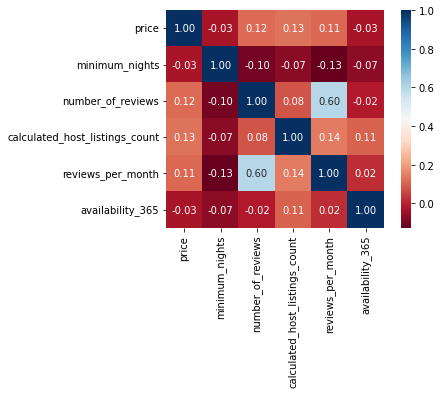

In [55]:
# visualizando a correlação com a biblioteca seaborn
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Várias variáveis apresentam correlações negativas entre elas. Notamos, também, correlações positivas onde destacamos a relação dos reviews por mês e o número de reviews, variáveis que são diretamente ligadas devido o número de visualizações nos mês depender do número de visualizações de cada acomodação.

#### Qual bairro apresenta o preço médio mais alto?

Agrupando os dados pelos bairros e extraindo a média do preço de cada um, podemos observar os $10$ primeiros bairros tem valores acima de $500$ pesos.

* O bairro Cuajimalpa de Morelos possui parques e ruínas para visita de turistas. O bairro Miguel Hidalgo apresenta lojas de luxos, museus, bosques e vistas para a cidade. Está situadi em uma porção nobre da cidade. O bairro Cuauhtémoc é o centro da cidade, com badalados bares e casas noturnas mas também monumentos históricos. Bairro muito procurado muito procurado pelos turística pela localidade do centro e diversas opções para conhecer, sair e aproveitar. O preço máximo de acomodações nessas localidades podem chegar até $1500$ pesos.

* Os bairros Azcapotzalco e Gustavo A. Madero estão situados mais ao norte da capital. São locais mais retirados do centro que apresentam diversas lojas.

In [56]:
# Ordem crescente dos preços médio dos bairros
df_limpo.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Cuajimalpa de Morelos     846.880734
Miguel Hidalgo            818.710539
Cuauhtémoc                763.165722
Álvaro Obregón            656.953634
Benito Juárez             646.410025
La Magdalena Contreras    599.663866
Coyoacán                  587.588496
Venustiano Carranza       545.584323
Azcapotzalco              529.352381
Gustavo A. Madero         520.527331
Name: price, dtype: float64

In [57]:
# preço máximo do bairro cuajimalpa de morelos
print("Preço máximo de Cuajimalpa de Morelos: \t{}\n".format(df_limpo[df_limpo.neighbourhood == 'Cuajimalpa de Morelos'].price.max()))
print("Preço máximo de Miguel Hidalgo: \t{}\n".format(df_limpo[df_limpo.neighbourhood == 'Miguel Hidalgo'].price.max()))
print("Preço máximo de Cuauhtémoc: \t{}\n".format(df_limpo[df_limpo.neighbourhood == 'Cuauhtémoc'].price.max()))

Preço máximo de Cuajimalpa de Morelos: 	1500

Preço máximo de Miguel Hidalgo: 	1500

Preço máximo de Cuauhtémoc: 	1500



#### Comparando os bairros com o número de reviews

Podemos observar que os bairros mais procurados pelos turista que visitam o site da Airbnb são Miguel Hidalgo, Benito Juárez, Coyoacán, justamente por ser bairros que estão localizados mais no centro, com bairros nobres e próximos a locais festivos, o que é mais atrativo aos turistas. Também existe bairro central onde possui universidades, como é o caso de Cuauhtémoc, por ter uma demanda de estudantes no local, acaba sendo também bastante procurado, e neste caso é o bairro de maior procura.

Comparado esses resultados com o preço médio de cada bairro, podemos observar que a alta dos preços se da pela localidade, mas também pela procura dessas acomodações.

In [58]:
# Numero de visualizações de cada bairro
df_limpo.groupby('neighbourhood').number_of_reviews.sum().sort_values(ascending=False)[:10]

neighbourhood
Cuauhtémoc               204219
Miguel Hidalgo            57875
Benito Juárez             56682
Coyoacán                  32036
Venustiano Carranza       22058
Álvaro Obregón            11232
Tlalpan                    9459
Gustavo A. Madero          6254
Iztacalco                  5098
Cuajimalpa de Morelos      4328
Name: number_of_reviews, dtype: int64

#### Qual o tipo de acomodações mais alugados que são disponibilizados pelo Airbnb na cidade?

As acomodações disponibilizadas pelos anfitriões se diferem em $4$ diferentes tipos. O primeiro deles, e mais procurados nas pesquisas, são as casas completas e apartamentos, geralmente procurados por pessoas em mudança de bairros de localidade e turistas, por oferecer comodidade e conforto. O preço médio dessas acomoções custa pouco menos que $880$ pesos. Em segundo, podemos observar as salas privadas, geralmente procuradas mais a emprego. O preço médio está em torno de $500$ pesos. Por fim, podemos observar Quartos de hótel, que são as acomodações com o menor número de inscrições por parte de anfitriões e que não existe tanta procura, quando comparado a saladas privadas e apartamentos. O preço médio está em torno de $720$ pesos, podendo chegar a $1499$ pesos.

In [59]:
# contagem de cada valor da variavel room_type
df_limpo['room_type'].value_counts()

Entire home/apt    7334
Private room       6958
Shared room         253
Hotel room          115
Name: room_type, dtype: int64

In [60]:
# Preço maximo de Hotel
print("\n Preço máximo da acomodação Hotel room: \t{}\n".format(df_limpo[df.room_type == 'Hotel room'].price.max()))

# preco medio de cada tipo de acomodação
df_limpo.groupby('room_type').price.mean().sort_values(ascending=False)


 Preço máximo da acomodação Hotel room: 	1499



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


room_type
Entire home/apt    878.330243
Hotel room         716.400000
Private room       501.771486
Shared room        401.581028
Name: price, dtype: float64

In [61]:
df_limpo.groupby('room_type').number_of_reviews.sum().sort_values(ascending=False)

room_type
Entire home/apt    287021
Private room       127640
Hotel room           1688
Shared room          1362
Name: number_of_reviews, dtype: int64

---

### Visualização das coordenadas das acomodações

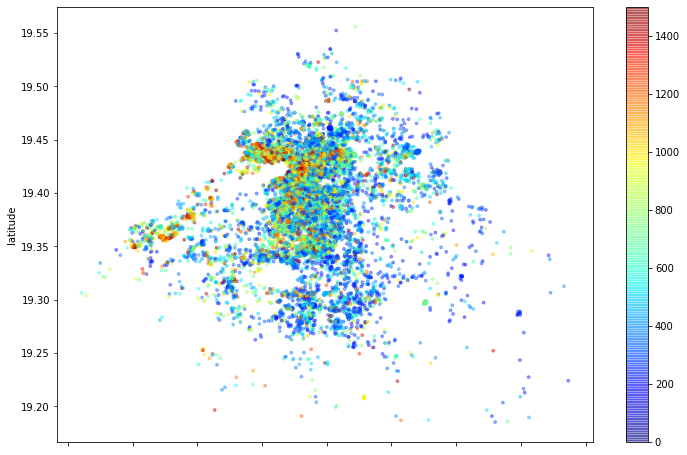

In [62]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [63]:
# Instalando e importando a biblioteca folium para grafico geografico
!pip install -q folium
import folium

In [64]:
# gerando grafico a partir da localização do disponibilizada pelo google
mexico = folium.Map(
    location = [19.413834471385858, -99.10932272489627],
    zoom_start=10.5
    )

mexico

In [65]:
# extraindo coordenadas latitude e longitute e salvando em uma variavel
coordenadas = []

for lat, longt in zip(df_limpo.latitude.values, df_limpo.longitude.values):
    coordenadas.append([lat, longt])

In [78]:
# Plotando coordenadas no mapa com icones
for i in range(0, len(coordenadas)):
    folium.Marker(
        location = [coordenadas[i][0], coordenadas[i][1]], 
        icon=folium.Icon(color='red')
        ).add_to(mexico)
print(mexico.save('test7.html'))

None


## Conclusão

Nesse notebook, foi realizada uma análise superficial dos dados do Airbnb da Cidade do México. Podemos observar pontos importantes e fortes no estudo das acomodações disponíveis para locação na região, assim como seu preço e localização das moradias de cada anfitrião. 

Lembrando que esse *dataset* disponibilizado é o mais resumido, ideal para uma abordagem inicial de estudos. Para estudos mais profundos e específicos, recomenda-se o uso do *dataset* mais completo, contendo um número maior de variáveis.  

Após essa análise, verifique o tipo de acomodação e localização que esteja interessado nesse destino, prepare o espanhol e vamos aproveitar cada cantinho desse destino.

##### *Vamos a la Cidad del Mexico! Arriba! Arriba!* 

<div align='center'>
    <img src="https://user-images.githubusercontent.com/94764799/143241468-fcd43338-11b8-4719-9afc-41906c71961b.png" width="30%">
</div>

In [74]:
mexico